In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from datetime import datetime
from os import path
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

In [3]:
path_to_train = path.join(path.abspath('..'), 'data', 'train.csv')
path_to_test = path.join(path.abspath('..'), 'data', 'test.csv')

In [4]:
train = pd.read_csv(path_to_train)
test = pd.read_csv(path_to_test)

In [5]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [6]:
for col in train.columns:
    if col not in ['id', 'target']:
        print(f'{col:5s}: {train[col].nunique():4.0f}, {train[col].isna().sum():5.0f}')

bin_0:    2, 17894
bin_1:    2, 18003
bin_2:    2, 17930
bin_3:    2, 18014
bin_4:    2, 18047
nom_0:    3, 18252
nom_1:    6, 18156
nom_2:    6, 18035
nom_3:    6, 18121
nom_4:    4, 18035
nom_5: 1220, 17778
nom_6: 1519, 18131
nom_7:  222, 18003
nom_8:  222, 17755
nom_9: 2218, 18073
ord_0:    3, 18288
ord_1:    5, 18041
ord_2:    6, 18075
ord_3:   15, 17916
ord_4:   26, 17930
ord_5:  190, 17713
day  :    7, 17952
month:   12, 17988


In [7]:
test['target'] = -1
df = pd.concat([train, test])

for col in df.columns:
    if col not in ['id', 'target']:
        counts = df.groupby(col)['target'].count()        
        
        sum_counts = ''
        
        for n in range(5, 200, 20):
            nobs = 100 * counts[counts < n].sum() / len(train)
            
            if nobs > 0:
                sum_counts += f'{n:3.0f}: {nobs:4.1f}, '
        
        print(f'{col:5s}: {sum_counts}')

bin_0: 
bin_1: 
bin_2: 
bin_3: 
bin_4: 
nom_0: 
nom_1: 
nom_2: 
nom_3: 
nom_4: 
nom_5:   5:  0.0,  25:  0.1,  45:  0.1,  65:  0.3,  85:  0.4, 105:  0.5, 125:  0.8, 145:  1.3, 165:  1.9, 185:  2.2, 
nom_6:   5:  0.0,  25:  0.1,  45:  0.2,  65:  0.4,  85:  0.6, 105:  1.0, 125:  1.6, 145:  2.2, 165:  2.9, 185:  3.4, 
nom_7: 125:  0.0, 145:  0.0, 165:  0.0, 185:  0.0, 
nom_8: 105:  0.0, 125:  0.0, 145:  0.0, 165:  0.0, 185:  0.0, 
nom_9:   5:  0.0,  25:  0.1,  45:  0.4,  65:  0.8,  85:  1.5, 105:  2.5, 125:  3.6, 145:  4.7, 165:  6.1, 185:  7.5, 
ord_0: 
ord_1: 
ord_2: 
ord_3: 
ord_4: 
ord_5: 165:  0.1, 185:  0.1, 
day  : 
month: 


In [8]:
from cafeen import utils
df = utils.mark_as_na(df, ['nom_5', 'nom_6', 'nom_9'], threshold=50)

for col in df.columns:
    if col not in ['id', 'target']:
        counts = df.groupby(col)['target'].count()        
        
        sum_counts = ''
        
        for n in range(5, 200, 20):
            nobs = 100 * counts[counts < n].sum() / len(train)
            
            if nobs > 0:
                sum_counts += f'{n:3.0f}: {nobs:4.1f}, '
        
        print(f'{col:5s}: {sum_counts}')

bin_0: 
bin_1: 
bin_2: 
bin_3: 
bin_4: 
nom_0: 
nom_1: 
nom_2: 
nom_3: 
nom_4: 
nom_5:  65:  0.1,  85:  0.2, 105:  0.4, 125:  0.6, 145:  1.2, 165:  1.7, 185:  2.1, 
nom_6:  65:  0.1,  85:  0.3, 105:  0.8, 125:  1.3, 145:  1.9, 165:  2.7, 185:  3.2, 
nom_7: 125:  0.0, 145:  0.0, 165:  0.0, 185:  0.0, 
nom_8: 105:  0.0, 125:  0.0, 145:  0.0, 165:  0.0, 185:  0.0, 
nom_9:  65:  0.3,  85:  1.0, 105:  2.0, 125:  3.1, 145:  4.2, 165:  5.6, 185:  6.9, 
ord_0: 
ord_1: 
ord_2: 
ord_3: 
ord_4: 
ord_5: 165:  0.1, 185:  0.1, 
day  : 
month: 


/home/alex/miniconda3/envs/cafeen/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == -1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


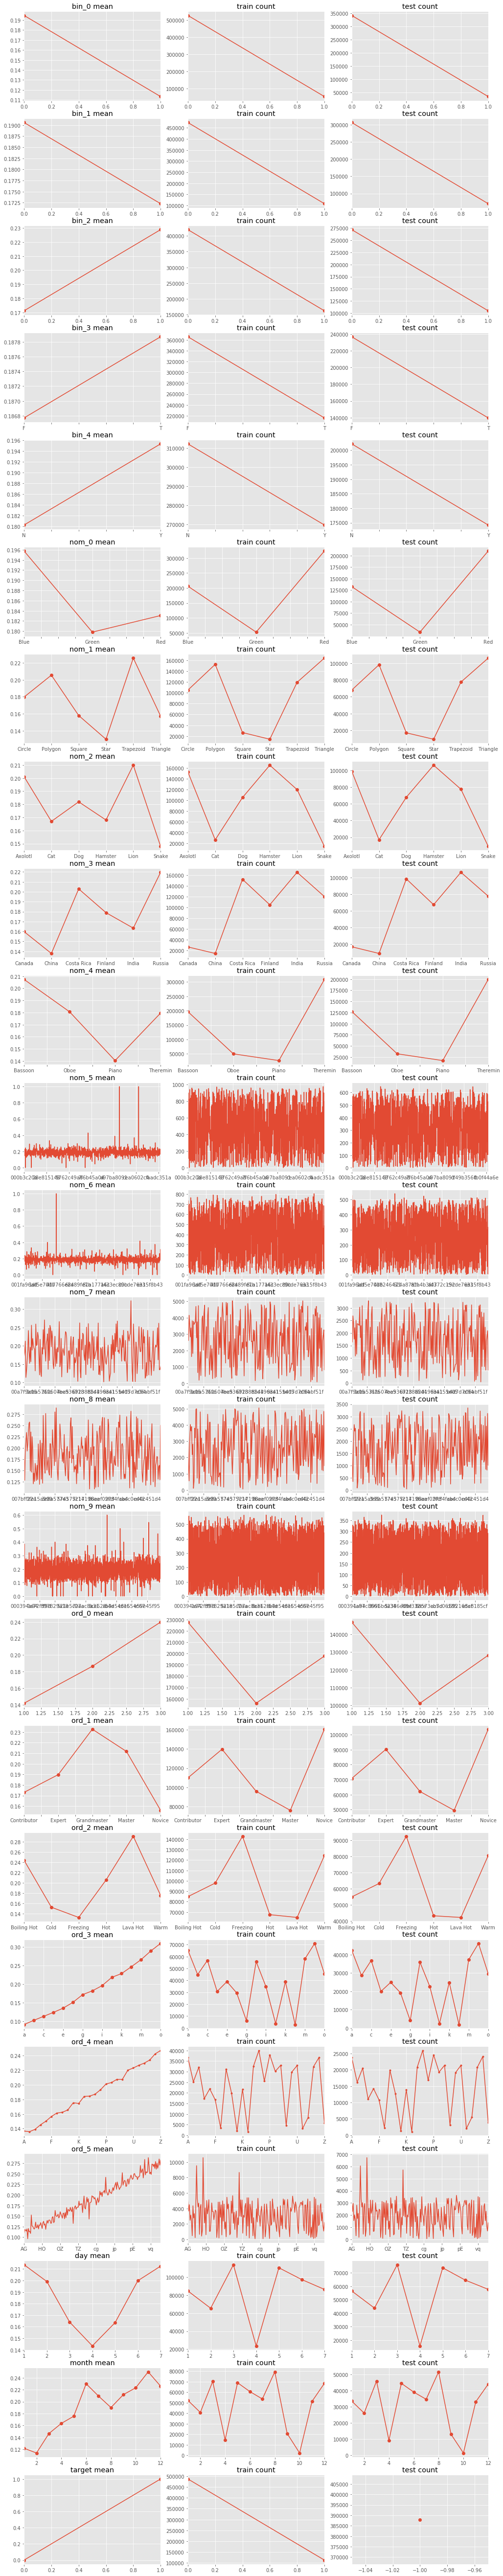

In [9]:
features = [col for col in test.columns if col not in ['id']]
nrows = len(features)
ncols = 3

fig, ax = plt.subplots(nrows, ncols, figsize=(17,4*nrows))

for i in range(nrows):
    if train[features[i]].nunique() <= 15:
        marker = 'o'
    elif train[features[i]].nunique() <= 50:
        marker = '.'
    else:
        marker = None
    
    train.groupby(features[i])['target'].mean().plot(ax=ax[i, 0], marker=marker)
    train.groupby(features[i])['target'].count().plot(ax=ax[i, 1], marker=marker)
    test.groupby(features[i])['day'].count().plot(ax=ax[i, 2], marker=marker)
    ax[i, 0].set_title(features[i] + ' mean')
    ax[i, 1].set_title('train count')
    ax[i, 2].set_title('test count')
    
    for j in range(ncols):
        ax[i, j].set_xlabel('')